# 예측 애널리틱스: 정규화모델 실습

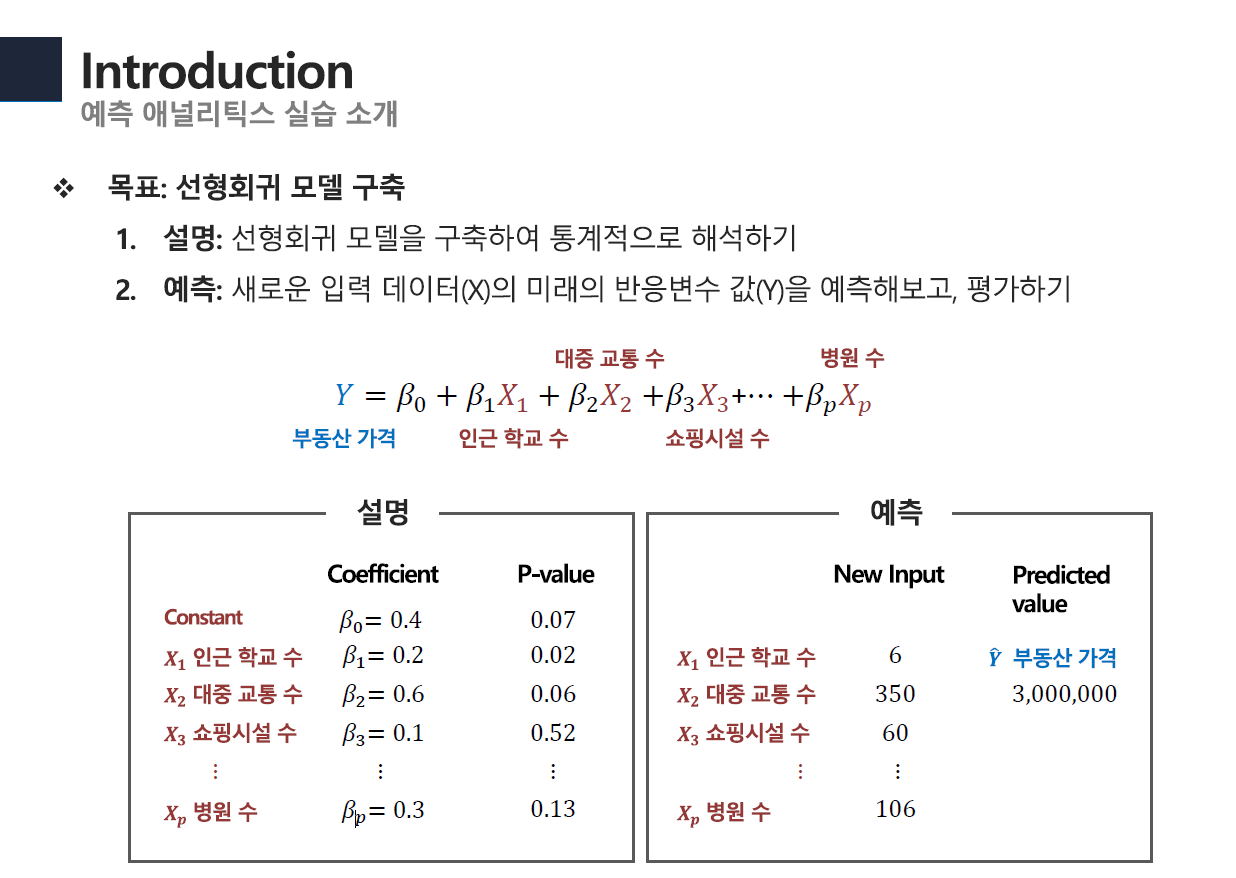

##### jupyter notebook 단축키

- ctrl+enter: 셀 실행   
- shift+enter: 셀 실행 및 다음 셀 이동   
- alt+enter: 셀 실행, 다음 셀 이동, 새로운 셀 생성
- a: 상단에 새로운 셀 만들기
- b: 하단에 새로운 셀 만들기
- dd: 셀 삭제(x: 셀 삭제)

### 1. 모듈 불러오기

import 불러올 패키지명 as 그 패키지를 파이썬에서 사용할 이름

In [1]:
# 실습용 데이터 패키지
from sklearn.datasets import load_boston

# 데이터 전처리 패키지
import numpy as np
import pandas as pd

# 기계학습 모델 구축 및 평가 패키지
import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

In [2]:
#!pip insall ~~~

### 2. 데이터 불러오기

https://archive.ics.uci.edu/ml/datasets.php

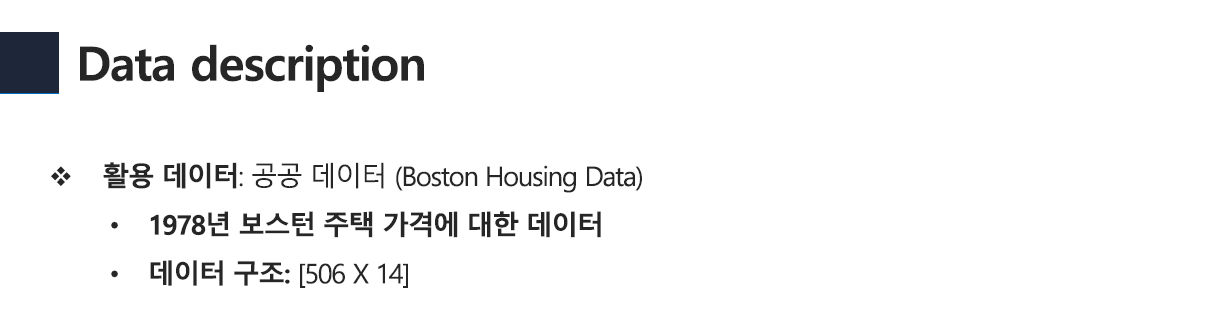

데이터 구조  
- 데이터: 1978년 보스턴 주택 가격  
- 관측치 개수: 506개
- 변수 개수: 설명변수 13개 / 반응변수 1개

설명 변수(원인: 예측값을 설명할 수 있는 변수)      
- CRIM: 범죄율  
- INDUS: 비소매상업지역 면적 비율  
- NOX: 일산화질소 농도  
- RM: 주택당 방 수  
- LSTAT: 인구 중 하위 계층 비율  
- B: 인구 중 흑인 비율  
- PTRATIO: 학생/교사 비율  
- ZN: 25,000 평방피트를 초과 거주지역 비율  
- CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0  
- AGE: 1940년 이전에 건축된 주택의 비율  
- RAD: 방사형 고속도로까지의 거리  
- DIS: 직업센터의 거리  
- TAX: 재산세율  

반응 변수(결과: 예측하고자 하는 값)
- MEDV: 주택가격

In [3]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# 데이터 확인
# 패키지 제공이 아닌, 새롭게 로드해서 사용하는 데이터의 경우: boston = pd.read_csv('directory/data.csv')
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
# 데이터 y값 확인
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
# 데이터 변수명 확인
# 패키지 제공이 아닌, 새롭게 로드해서 사용하는 데이터의 경우: boston_columns = boston.columns
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
# 데이터 규격 확인
# 패키지 제공이 아닌, 새롭게 로드해서 사용하는 데이터의 경우: boston_shape = boston.shape
boston.data.shape

(506, 13)

### 3. 데이터 전처리하기

$\mathbf{X}$: 독립변수, 예측변수, 입력변수 <br>
$\mathbf{y}$: 종속변수, 반응변수, 출력변수

In [8]:
# 데이터 프레임 형태로 변환
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['MEDV'])

In [9]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [10]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


#### 3.1 Train set / Test set 나누기

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

### 4. 선형회귀 모델 구축하기

[statsmodels의 OLS를 사용하여 선형회귀분석 시행 (OLS: Ordinary Least Squares)]
 - OLS: 가장 기본적인 결정론적 선형 회귀 방법으로 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치(β1, β2 ...) 구하는 방법
 - 모델 선언: model = sm.OLS(Y데이터, X데이터)   
 - 모델 학습: model_trained = model.fit()

#### 4.1 선형회귀 모델 가정 확인하기

In [13]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train, axis=1)
model_trained = model.fit()

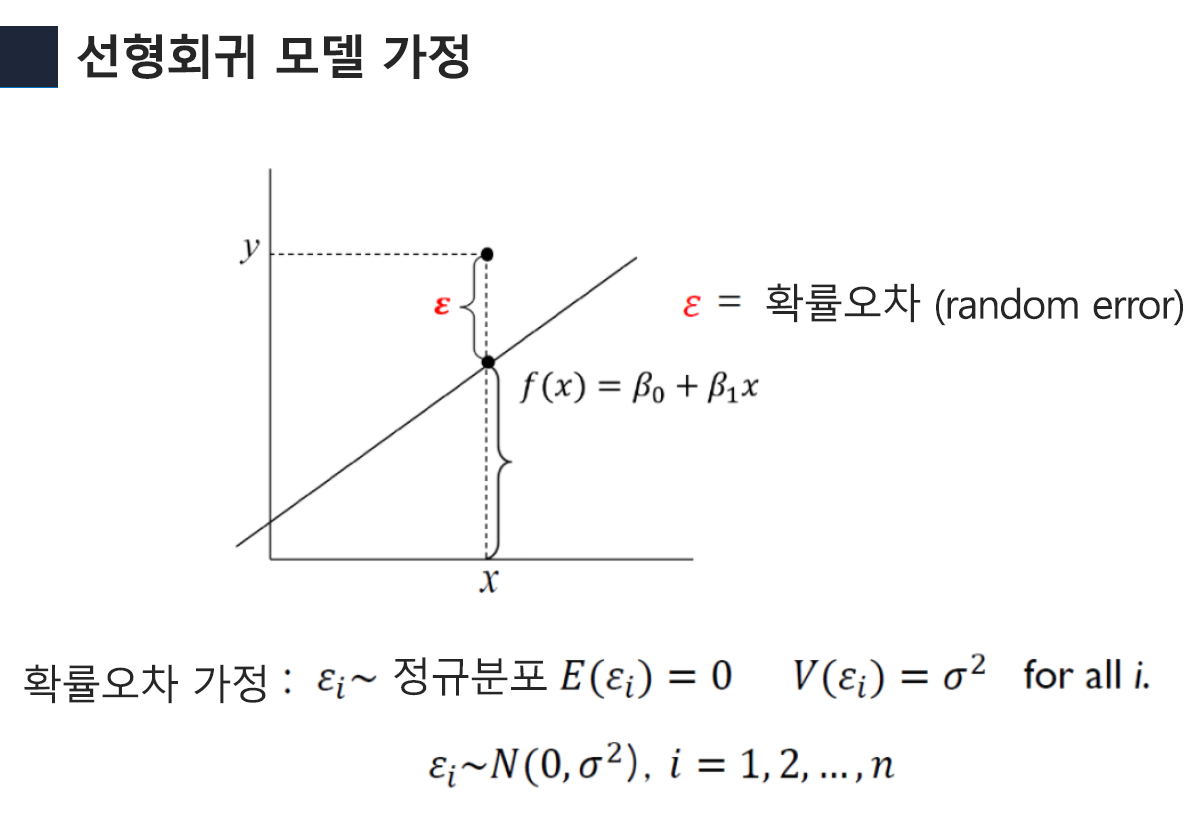

#### 4.1.1 확률오차의 정규성 확인

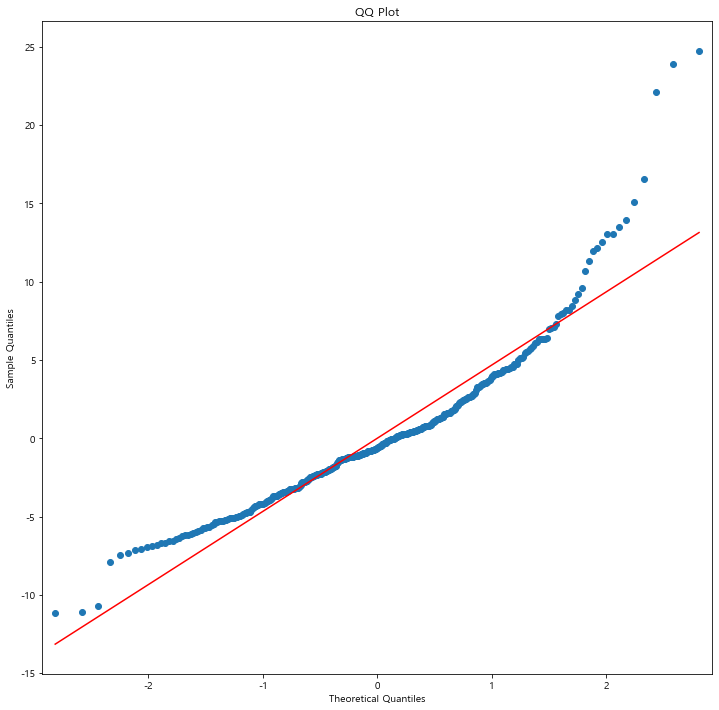

In [14]:
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

In [34]:
model_residuals

28     -1.369709
498    -0.059797
284     0.765858
414    11.983011
123     1.801067
         ...    
109    -0.579809
128    -1.021033
57     -1.897026
341     2.448366
116    -2.177192
Length: 404, dtype: float64

#### 4.1.2 확률오차의 등분산성 확인

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Fitted values')]

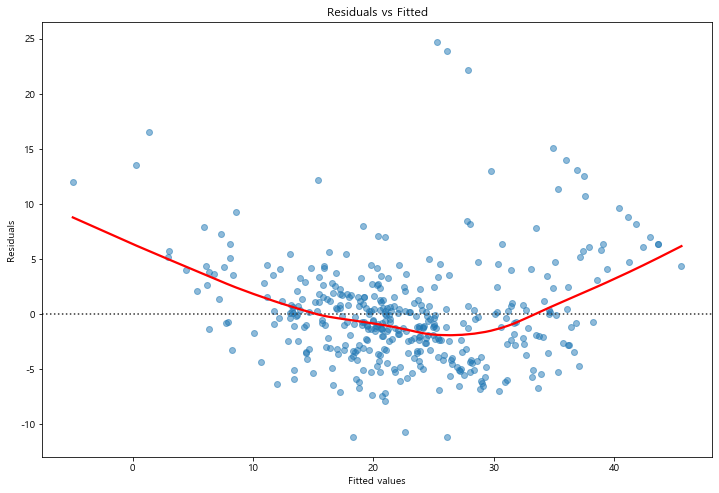

In [15]:
model_fitted_y= model_trained.fittedvalues

fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws={'alpha': 0.5}, 
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

#### 4.2 설명: 통계적으로 해석하기
- R-squared (결정계수,coefficient of determination):모형의 성능
- coef (회귀계수): X가 한단위 증가할 때 Y의 변화량
- P>[t] (p-value):0.05(유의수준) 이하일 때 변수가 유의미

In [16]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     93.01
Date:                Wed, 24 Mar 2021   Prob (F-statistic):          1.02e-110
Time:                        23:41:55   Log-Likelihood:                -1196.3
No. Observations:                 404   AIC:                             2421.
Df Residuals:                     390   BIC:                             2477.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.0744      5.844      6.002      0.0

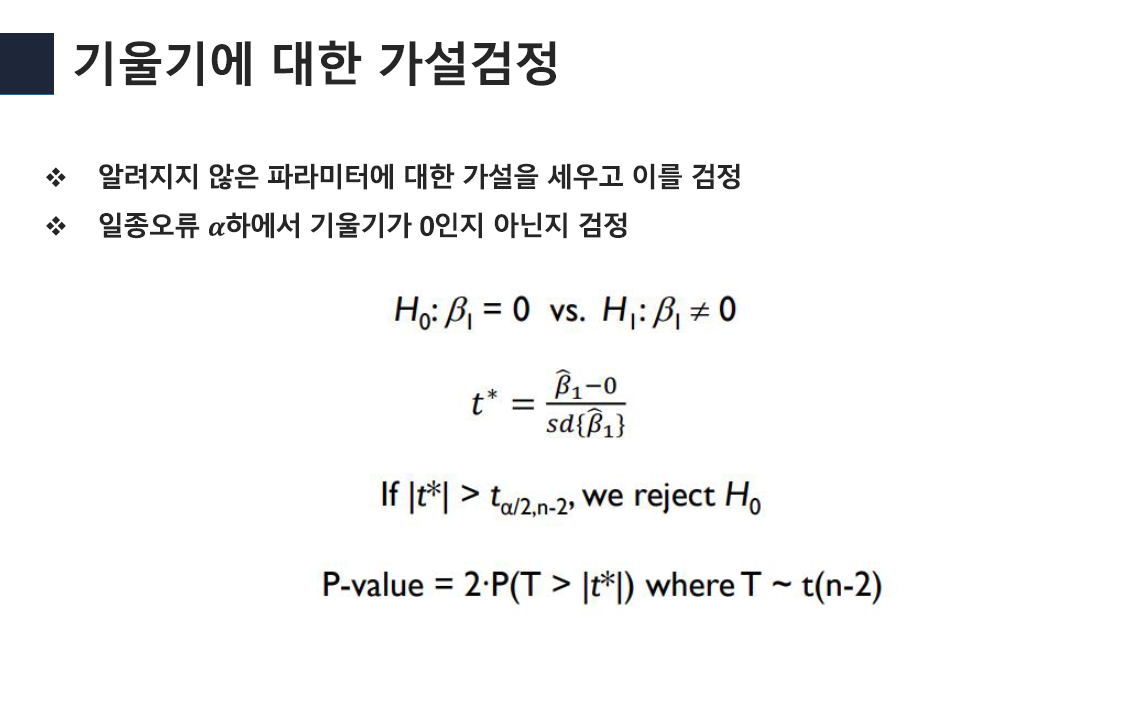

[P-value가 높은 변수 제거: INDUS,AGE]

INDUS: 비소매상업지역 면적 비율  
AGE: 1940년 이전에 건축된 주택의 비율 

In [17]:
model = sm.OLS(y_train, X_train.drop(['INDUS', 'AGE'], axis=1))
model_trained = model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     110.3
Date:                Wed, 24 Mar 2021   Prob (F-statistic):          1.19e-112
Time:                        23:41:55   Log-Likelihood:                -1196.5
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     392   BIC:                             2465.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.6295      5.783      5.988      0.0

#### 4.3 예측: 미래의 반응변수 값 예측하기

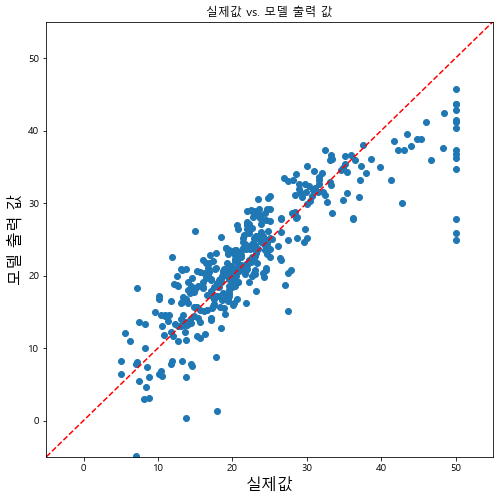

In [18]:
y_train_pred = model_trained.fittedvalues

plt.figure(figsize=(8, 8))
plt.title('실제값 vs. 모델 출력 값')
plt.scatter(y_train, y_train_pred)
plt.plot([-5, 55], [-5, 55], ls="--", c='red')
plt.xlabel('실제값', size=16)
plt.ylabel('모델 출력 값', size=16)
plt.xlim(-5, 55)
plt.ylim(-5, 55)
plt.show()

In [19]:
X_test = sm.add_constant(X_test)

In [20]:
y_test_pred = model_trained.predict(X_test.drop(['INDUS', 'AGE'], axis=1))
y_test_pred.head()

210    22.787949
24     15.482380
36     22.346630
439    13.433993
161    36.890921
dtype: float64

#### 4.3.1 Mean Squared Error (평균 제곱 오차) <br>
$\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}$   

In [21]:
print(mean_squared_error(y_test, y_test_pred))

23.063158240353737


#### 4.3.2 Root Mean Squared Error (제곱근 평균 제곱 오차) <br>
$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}}$

In [22]:
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

4.802411710833812


#### 4.3.3 Mean Absolute Error (평균 절대 오차)<br>
$\frac{1}{n} \sum_{i=1}^{n} |y_{i} - \hat{y}_{i}|$

In [23]:
print(mean_absolute_error(y_test, y_test_pred))

3.512302350895111


#### 4.3.4 Mean Absolute Percentage Error (평균 절대 백분율 오차) <br>
$\frac{1}{n}\sum_{i=1}^{n} \left|\frac{y_{i} - \hat{y}_{i}}{y_{i}} \right| \times 100\%$

In [24]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
print(mean_absolute_error(y_test, pd.DataFrame(y_test_pred)))

3.512302350895111


#### 4.3.5 R squared (결정계수) <br>

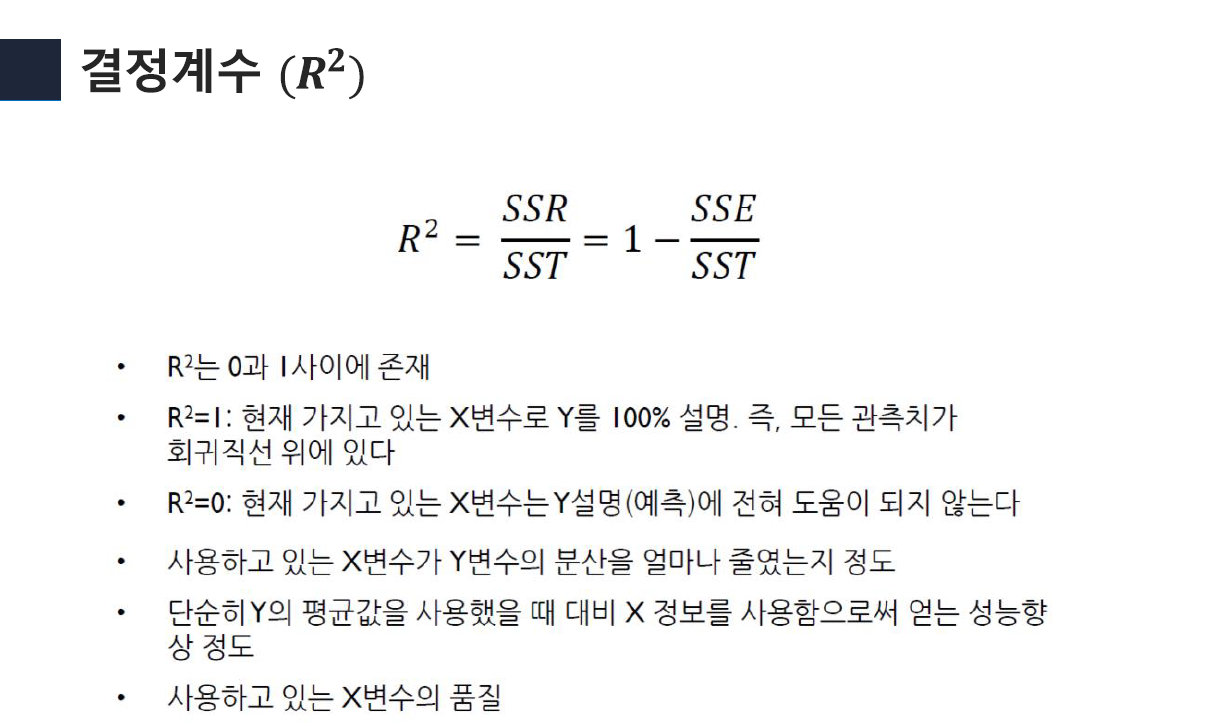

In [25]:
print(r2_score(y_test, y_test_pred))

0.638940321549958


#### 4.3.6 최종 결과정리

In [26]:
print('Training MSE: {:.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(y_train, y_train_pred)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred)))
print('Training R2: {:.3f}'.format(r2_score(y_train, y_train_pred)))

Training MSE: 21.881
Training RMSE: 4.678
Training MAE: 3.315
Training MAPE: 51.174
Training R2: 0.756


In [27]:
print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_test, y_test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, y_test_pred)))

Testing MSE: 23.063
Testing RMSE: 4.802
Testing MAE: 3.512
Testing MAPE: 43.946
Testing R2: 0.639


### 6. StatModels VS Sklearn

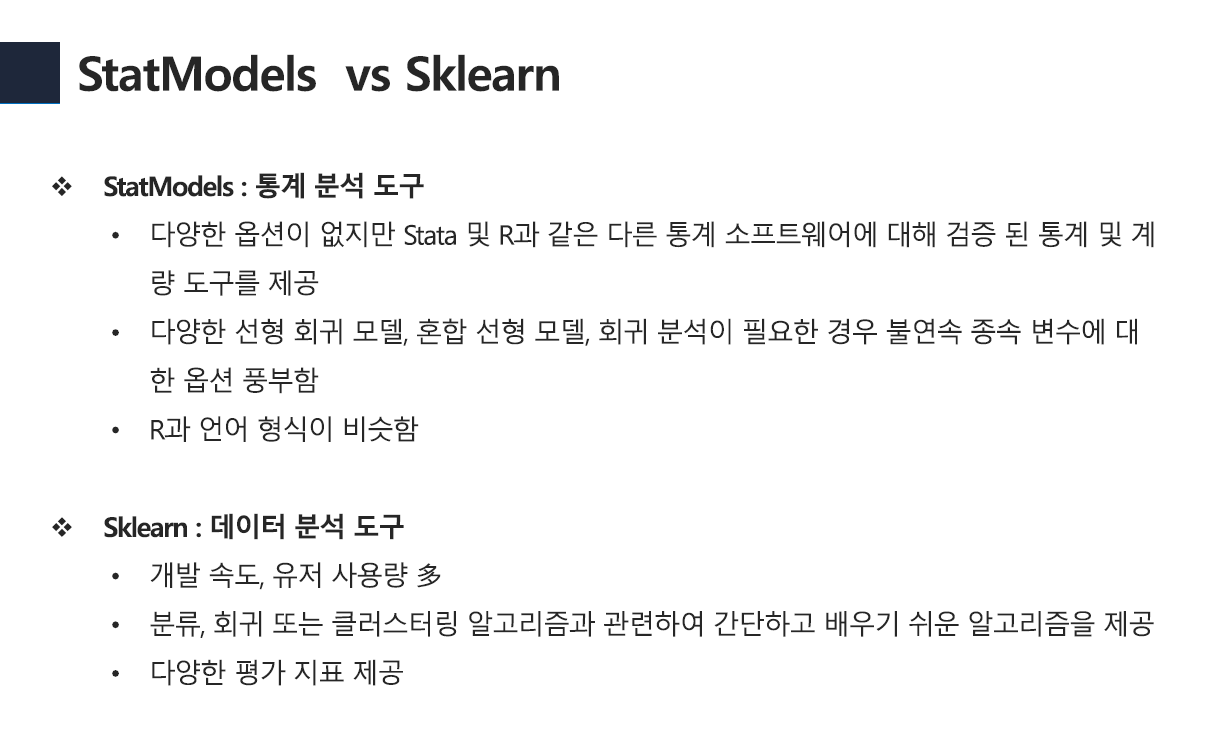

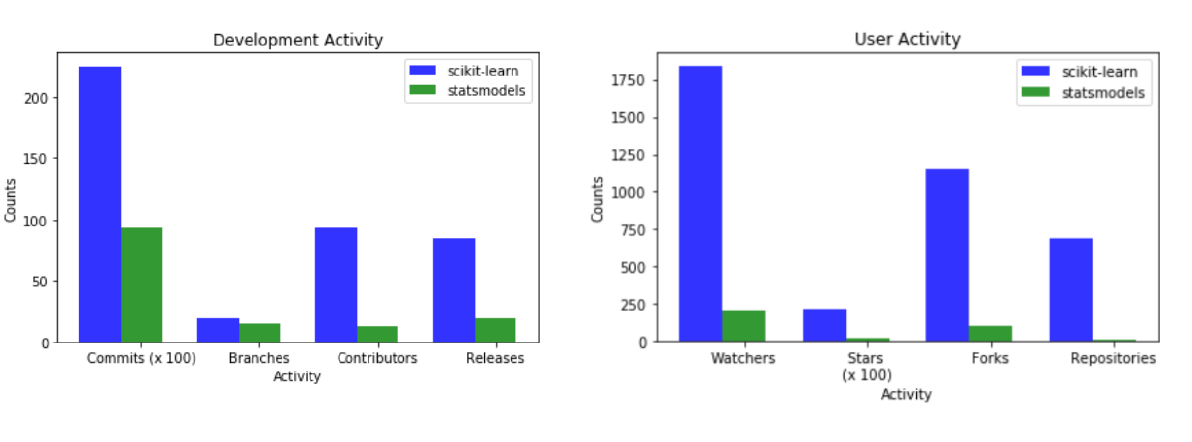

In [28]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [29]:
lr_skl = LinearRegression(fit_intercept=False) # default가 fit_intercept=True
lr_skl.fit(X_train, y_train)
y_pred_skl = lr_skl.predict(X_test)

lr_stat = sm.OLS(y_train,X_train).fit()
y_pred_stat = lr_stat.predict(X_test)

#### 6.1 StatModels 결과

In [30]:
test_mse_stat = mean_squared_error(y_test, y_pred_stat)
test_rmse_stat = np.sqrt(mean_squared_error(y_test, y_pred_stat))
test_mae_stat = mean_absolute_error(y_test, y_pred_stat)
test_mape_stat = mean_absolute_percentage_error(y_test, pd.DataFrame(y_pred_stat))
test_r2_stat = r2_score(y_test, y_pred_stat)

print('Testing MSE: {:.3f}'.format(test_mse_stat))
print('Testing RMSE: {:.3f}'.format(test_rmse_stat))
print('Testing MAE: {:.3f}'.format(test_mae_stat))
print('Testing MAPE: {:.3f}'.format(test_mape_stat))
print('Testing R2: {:.3f}'.format(test_r2_stat))

Testing MSE: 23.300
Testing RMSE: 4.827
Testing MAE: 3.519
Testing MAPE: 17.366
Testing R2: 0.635


#### 6.2 Sklearn 결과

In [31]:
test_mse_skl = mean_squared_error(y_test, y_pred_skl)
test_rmse_skl = np.sqrt(mean_squared_error(y_test, y_pred_skl))
test_mae_skl = mean_absolute_error(y_test, y_pred_skl)
test_mape_skl = mean_absolute_percentage_error(y_test, y_pred_skl)
test_r2_skl = r2_score(y_test, y_pred_skl)

print('Testing MSE: {:.3f}'.format(test_mse_skl))
print('Testing RMSE: {:.3f}'.format(test_rmse_skl))
print('Testing MAE: {:.3f}'.format(test_mae_skl))
print('Testing MAPE: {:.3f}'.format(test_mape_skl))
print('Testing R2: {:.3f}'.format(test_r2_skl))

Testing MSE: 23.300
Testing RMSE: 4.827
Testing MAE: 3.519
Testing MAPE: 17.366
Testing R2: 0.635


In [32]:
np.array(y_pred_stat).shape

(102,)

In [33]:
np.array(y_pred_skl).shape

(102, 1)

# EOD